In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split as split

In [135]:
def read_data(start,end):
    '''
    Reads all data and places it in a numpy array
    Start: first year of data
    end: last year of data
    
    Returns: numpy array of all data'''
    
    #read in data and place it into a single dataframe
    df = None
    for i in range(start,end):
        tmp_df = pd.read_csv('NCAA_Season_Stats_{}.csv'.format(i))
        if df is None:
            df = tmp_df.copy()
        else:
            df = pd.concat([df,tmp_df])
        
    #replace the remaining Nan values with the averages of their columns
    for n,i in enumerate(sum(df.isnull().values)):
        if i != 0:
            mean =df.iloc[:,n].astype('float64').mean()
            df.iloc[:,n].fillna(value=mean, inplace=True)
            
    return np.array(df)


In [136]:
data = np.array(read_data(1993,2021))
data.shape
X = data[:,1:-1]
y = data[:,-1]

In [137]:
# PCA decomp
decomp = PCA(2)
X_reduced = decomp.fit_transform(X)

In [138]:
# Use KMeans
k_mean = KMeans(2)
labels = k_mean.fit_predict(X_reduced)

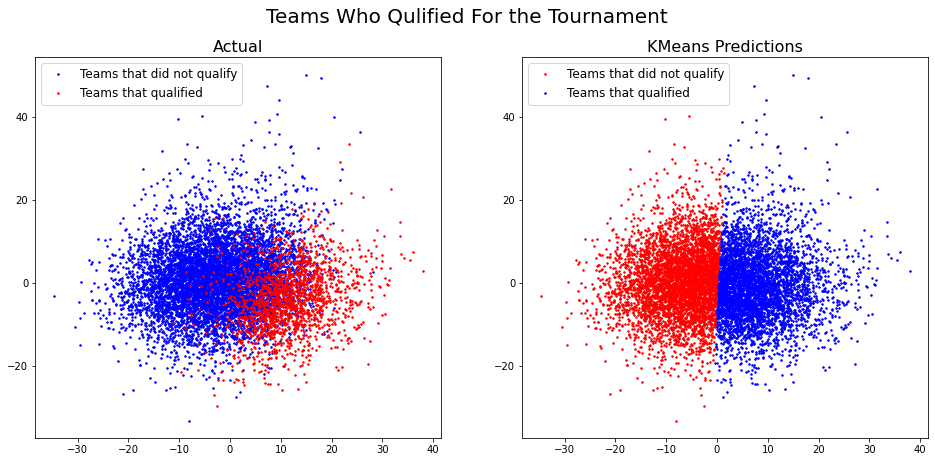

In [139]:
# plot
plt.figure(figsize=(16,7))

ax1 = plt.subplot(121)
ax1.plot(X_reduced[y == False][:,0], X_reduced[y == False][:,1], 'b.', markersize=3, label="Teams that did not qualify")
ax1.plot(X_reduced[y == True][:,0], X_reduced[y == True][:,1], 'r.', markersize=3, label="Teams that qualified")
ax1.set_title("Actual", fontsize=16)
ax1.legend(fontsize=12)

ax2 = plt.subplot(122)
ax2.plot(X_reduced[labels == False][:,0], X_reduced[labels == False][:,1], 'r.', markersize=3, label="Teams that did not qualify")
ax2.plot(X_reduced[labels == True][:,0], X_reduced[labels == True][:,1], 'b.', markersize=3, label="Teams that qualified")
ax2.set_title("KMeans Predictions", fontsize=16)
ax2.legend(fontsize=12)

plt.suptitle("Teams Who Qulified For the Tournament", fontsize=20)
plt.show()

In [145]:
k_mean = KMeans(2)
labels = k_mean.fit_predict(X_reduced)
sil_score = silhouette_score(X_reduced, labels)
print("Silhouette score:", sil_score)
ami_score = ami(y, labels)
print("Adjusted Mutual Info Score:", ami_score, '\n')

Silhouette score: 0.3522967217439751
Adjusted Mutual Info Score: 0.21772261700716203 



In [141]:
def shuffle_data(X, y):
    data = list(zip(X, y))
    random.shuffle(data)
    newX = [d[0] for d in data]
    newy = [d[1] for d in data]
    return np.array(newX), np.array(newy)

In [142]:
X, y = shuffle_data(X, y)

# PCA decomp
decomp = PCA(2)
X_reduced = decomp.fit_transform(X)

X_train, X_test, y_train, y_test = split(X_reduced,y,test_size=.3, random_state=8)

mMadness = MLP(random_state=0, hidden_layer_sizes=(15, 15), activation='identity',
                   alpha=.0001, learning_rate_init=.2, max_iter=30).fit(X_train, y_train)

predictions = mMadness.predict(X_test)

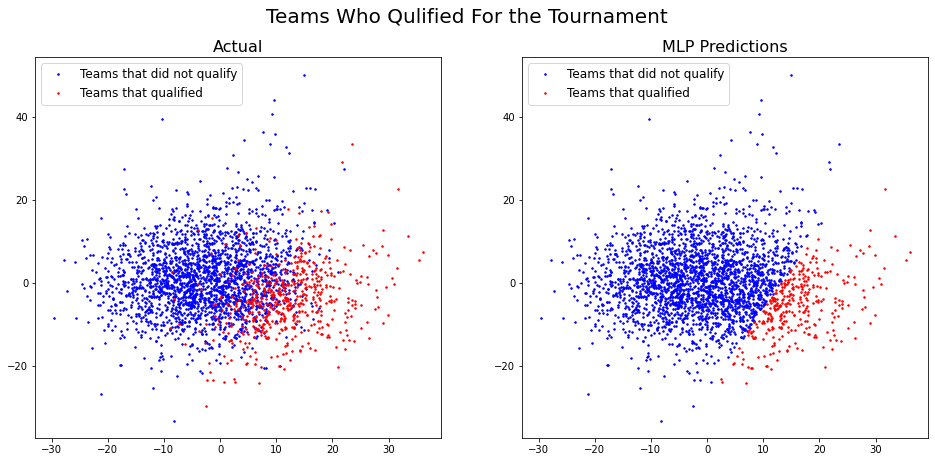

In [144]:
# plot
plt.figure(figsize=(16,7))

ax1 = plt.subplot(121)
ax1.plot(X_test[y_test == False][:,0], X_test[y_test == False][:,1], 'b.', markersize=3, label="Teams that did not qualify")
ax1.plot(X_test[y_test == True][:,0], X_test[y_test == True][:,1], 'r.', markersize=3, label="Teams that qualified")
ax1.set_title("Actual", fontsize=16)
ax1.legend(fontsize=12)

ax2 = plt.subplot(122)
ax2.plot(X_test[predictions == False][:,0], X_test[predictions == False][:,1], 'b.', markersize=3, label="Teams that did not qualify")
ax2.plot(X_test[predictions == True][:,0], X_test[predictions == True][:,1], 'r.', markersize=3, label="Teams that qualified")
ax2.set_title("MLP Predictions", fontsize=16)
ax2.legend(fontsize=12)

plt.suptitle("Teams Who Qulified For the Tournament", fontsize=20)
plt.show()

In [151]:
mMadness.score(X_test, y_test)

0.8846153846153846